In [31]:
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import LinearSVR
from sklearn.neural_network import MLPRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler,Normalizer,RobustScaler
from sklearn.pipeline import make_pipeline


from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

import matplotlib.pyplot as plt

from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline

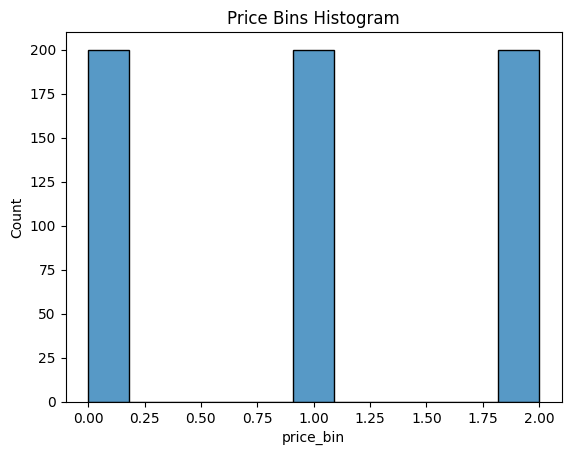

In [2]:
df = pd.read_csv('processed.csv', index_col=0)

df.drop(labels=['Price'], axis=1, inplace=True)

df = df.sample(frac=1, random_state=1)

over_sampling_strategy = {  
    1: 200,  
    2: 200   
}
under_sampling_strategy = { 
    0: 200
}

ros = RandomOverSampler(random_state=0,sampling_strategy=over_sampling_strategy)
rus = RandomUnderSampler(random_state=0,sampling_strategy=under_sampling_strategy)

pipeline = Pipeline([
    ('over',ros),
    ('under',rus)
])

X = df.drop(labels=['price_bin'], axis=1, inplace=False)
y = df['price_bin']

X_resampled, y_resampled = pipeline.fit_resample(X, y)

plt.title('Price Bins Histogram')
sns.histplot(y_resampled)
plt.show()

X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

In [3]:
from sklearn.feature_selection import f_classif

f, p = f_classif(X_train, y_train)


for i in range(len(f)):

    print(f"Column {X.columns[i]}: f-statistic {f[i]} & p value: {p[i]}")


Column Brand: f-statistic 2.7922294821850877 & p value: 0.06228647413676292
Column Battery: f-statistic 38.57872076584211 & p value: 2.952041523589596e-16
Column Screen size: f-statistic 57.109181552281974 & p value: 5.817759305562535e-23
Column Resolution x: f-statistic 134.7070878871761 & p value: 4.1776523017014945e-47
Column Resolution y: f-statistic 158.90960105000806 & p value: 1.2960798373815354e-53
Column Processor: f-statistic 26.869979614046787 & p value: 8.7564336883205e-12
Column Storage: f-statistic 72.7276403442434 & p value: 2.702951597817211e-28
Column Rear camera: f-statistic 29.25011523374186 & p value: 1.041007828103885e-12
Column Front camera: f-statistic 20.162810426664894 & p value: 3.9257473974659186e-09
Column OS: f-statistic 12.299893327951594 & p value: 6.185959473198008e-06
Column GPS: f-statistic 4.133508273067729 & p value: 0.0166042373444675
Column nSIM: f-statistic 7.189168686887386 & p value: 0.0008392973450666262
Column 4G: f-statistic 15.34554455912609

In [4]:
from sklearn.feature_selection import mutual_info_classif

mi = mutual_info_classif(X_train, y_train)

for i in range(len(mi)):

    print(f"Column {X.columns[i]} mutual information: {mi[i]}")

Column Brand mutual information: 0.3433084945696321
Column Battery mutual information: 0.21677734349895528
Column Screen size mutual information: 0.2682866287501233
Column Resolution x mutual information: 0.2942458100498824
Column Resolution y mutual information: 0.3722837634312508
Column Processor mutual information: 0.10555770690886446
Column Storage mutual information: 0.23731827031143604
Column Rear camera mutual information: 0.38553190443151264
Column Front camera mutual information: 0.1631312264577054
Column OS mutual information: 0.04117784973546956
Column GPS mutual information: 0.004111455811600884
Column nSIM mutual information: 0.0
Column 4G mutual information: 0.005547955373989666
Column RAM mutual information: 0.23240521310727646


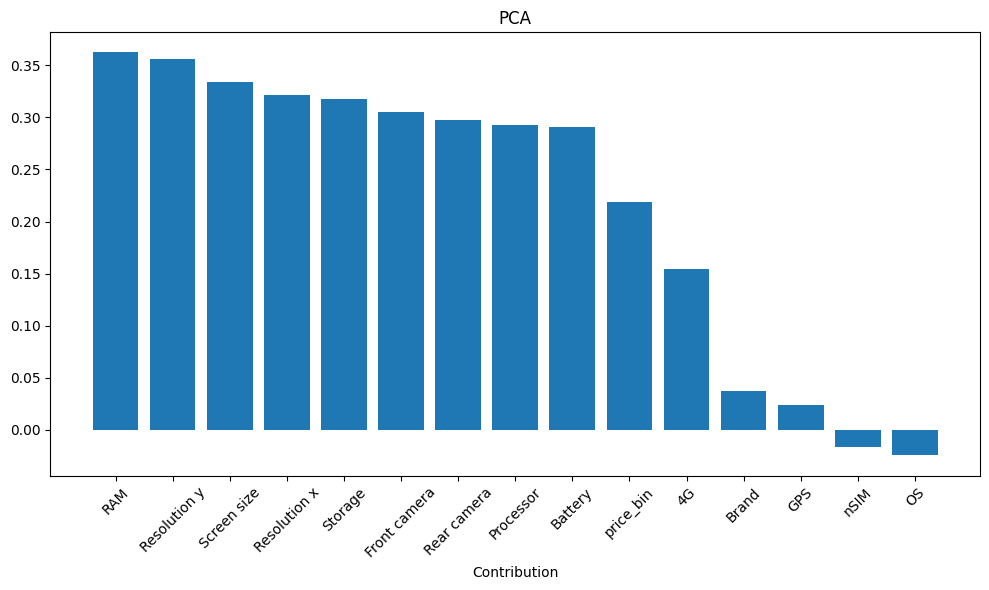

In [22]:
from sklearn.decomposition import PCA

def pca(df):
    df = df.drop(labels=['Price'], axis = 1, inplace=False)
    scaler = StandardScaler()
    scaled_data = scaler.fit_transform(df)
    
    pca = PCA()
    pca.fit(scaled_data)
    
    components = pca.components_[0]
    
    contributions_df = pd.DataFrame({
        'Feature': df.columns,
        'Contribution': components
    })
    
    contributions_df = contributions_df.sort_values(by='Contribution')[::-1]
    
    plt.figure(figsize=(10, 6))
    plt.bar(contributions_df['Feature'], contributions_df['Contribution'])
    plt.xlabel('Contribution')
    plt.xticks(rotation=45)
    plt.title("PCA")
    plt.tight_layout()
    plt.show()

df = pd.read_csv('processed.csv', index_col=0)

pca(df)

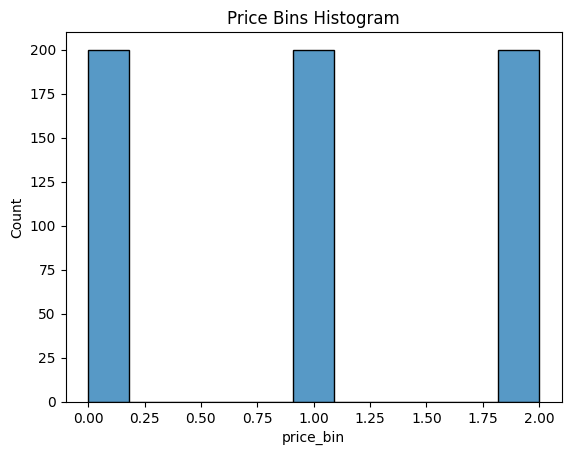

Reduced to 12 features


In [29]:
df = pd.read_csv('processed.csv', index_col=0)

df.drop(labels=['Price', 'nSIM', 'GPS'], axis=1, inplace=True)

df = df.sample(frac=1, random_state=1)

over_sampling_strategy = {  
    1: 200,  
    2: 200   
}
under_sampling_strategy = { 
    0: 200
}

ros = RandomOverSampler(random_state=0,sampling_strategy=over_sampling_strategy)
rus = RandomUnderSampler(random_state=0,sampling_strategy=under_sampling_strategy)

pipeline = Pipeline([
    ('over',ros),
    ('under',rus)
])

X = df.drop(labels=['price_bin'], axis=1, inplace=False)
y = df['price_bin']

X_resampled, y_resampled = pipeline.fit_resample(X, y)

plt.title('Price Bins Histogram')
sns.histplot(y_resampled)
plt.show()

X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

print(f'Reduced to {X_train.shape[1]} features')

In [ ]:
# Decision Tree
from sklearn.ensemble import RandomForestClassifier
pipeline_two = Pipeline([
     ('classifier', RandomForestClassifier())
])
param_grid = {
    'classifier__n_estimators': [4, 8, 16, 20],
    'classifier__max_depth': [None, 4, 8, 16],
    'classifier__min_samples_split': [2, 5, 10],
    'classifier__min_samples_leaf': [2, 4, 6]
}

def make_model(model,param_grid,scoring,X_train,Y_train):
    np.random.seed(0)
    grid_search = GridSearchCV(model, param_grid, cv=5, scoring=scoring)
    grid_search.fit(X_train, Y_train)
    
    print("Best Parameter:", grid_search.best_params_)
    print(f"Best {scoring}:", grid_search.best_score_)
    
    return grid_search.best_estimator_

def evaluate_classifier(model,X_train,Y_train,X_test,Y_test):
    
    train_prediction = model.predict(X_train)
    
    train_accuracy = accuracy_score(Y_train, train_prediction)
    train_f1 = f1_score(Y_train, model.predict(X_train),average='weighted')
    
    print("Train Classification Results")
    print(classification_report(Y_train,train_prediction))

    print("Train Confusion Matrix")
    print(confusion_matrix(Y_train, train_prediction))
    
    print("------------------------------")
    test_prediction = model.predict(X_test)
    test_accuracy = accuracy_score(Y_test, test_prediction)
    test_f1 = f1_score(Y_test, model.predict(X_test),average='weighted')
    
    print("Test Classification Results")
    print(classification_report(Y_test,test_prediction))
    
    return train_accuracy,train_f1,test_accuracy,test_f1


model_decision_tree = make_model(pipeline_two,param_grid,'accuracy',X_train,y_train)

evaluate_classifier(model_decision_tree,X_train,y_train,X_test,y_test)

c:\Users\user\.conda\envs\cs573\lib\site-packages\numpy\ma\core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


Best Parameter: {'classifier__max_depth': None, 'classifier__min_samples_leaf': 2, 'classifier__min_samples_split': 2, 'classifier__n_estimators': 16}
Best accuracy: 0.7916666666666667
Train Classification Results
              precision    recall  f1-score   support

           0       0.96      0.97      0.96       157
           1       0.96      0.95      0.95       164
           2       0.98      0.98      0.98       159

    accuracy                           0.96       480
   macro avg       0.96      0.96      0.96       480
weighted avg       0.96      0.96      0.96       480

Train Confusion Matrix
[[152   4   1]
 [  7 155   2]
 [  0   3 156]]
------------------------------
Test Classification Results
              precision    recall  f1-score   support

           0       0.89      0.91      0.90        43
           1       0.86      0.83      0.85        36
           2       0.98      0.98      0.98        41

    accuracy                           0.91       120
   ma

(0.9645833333333333,
 0.9645601977686314,
 0.9083333333333333,
 0.9081188279099887)

In [ ]:
import xgboost as xgb
from sklearn.metrics import f1_score, precision_score, recall_score, accuracy_score
from sklearn.model_selection import KFold



kf = KFold(n_splits=5, shuffle=True)

best_accuracy = 0
best_model = None

for train_index, test_index in kf.split(X_train):
    xgb_model = xgb.XGBClassifier(objective = 'multi:softmax').fit(X_train.iloc[train_index], y_train.iloc[train_index])

    predictions = xgb_model.predict(X_train.iloc[test_index])
    actuals = y_train.iloc[test_index]

    accuracy = accuracy_score(actuals, predictions)
    if accuracy >= best_accuracy:
        best_accuracy = accuracy

        best_model = xgb_model


predictions = best_model.predict(X_train)
actuals = y_train


print("Train Classification Results")
print(classification_report(actuals,predictions))

print("Train Confusion Matrix")
print(confusion_matrix(actuals, predictions))



predictions = best_model.predict(X_test)
actuals = y_test


print("Train Classification Results")
print(classification_report(actuals,predictions))

print("Train Confusion Matrix")
print(confusion_matrix(actuals, predictions))



Train Classification Results
              precision    recall  f1-score   support

           0       0.99      0.97      0.98       157
           1       0.95      0.97      0.96       164
           2       0.98      0.97      0.98       159

    accuracy                           0.97       480
   macro avg       0.97      0.97      0.97       480
weighted avg       0.97      0.97      0.97       480

Train Confusion Matrix
[[152   5   0]
 [  2 159   3]
 [  0   4 155]]


In [44]:
from sklearn.neural_network import MLPClassifier

pipeline = make_pipeline(MLPClassifier(max_iter=500))


param_grid = {
    'mlpclassifier__hidden_layer_sizes': [(24,), (12,), (24, 24), (24, 12)],
    'mlpclassifier__activation': ['relu', 'tanh'],
    'mlpclassifier__solver': ['sgd', 'adam'],
    'mlpclassifier__alpha': [0.0001, 0.001, 0.01], ## go up to combat overfitting
    'mlpclassifier__learning_rate_init': [0.001, 0.01, 0.0001]
}

def make_model(model,param_grid,scoring,X_train,Y_train):
    np.random.seed(0)
    grid_search = GridSearchCV(model, param_grid, cv=5, scoring=scoring)
    grid_search.fit(X_train, Y_train)
    
    print("Best Parameter:", grid_search.best_params_)
    print(f"Best {scoring}:", grid_search.best_score_)
    
    return grid_search.best_estimator_

def evaluate_classifier(model,X_train,Y_train,X_test,Y_test):
    
    train_prediction = model.predict(X_train)
    
    train_accuracy = accuracy_score(Y_train, train_prediction)
    train_f1 = f1_score(Y_train, model.predict(X_train),average='weighted')
    
    print("Train Classification Results")
    print(classification_report(Y_train,train_prediction))

    print("Train Confusion Matrix")
    print(confusion_matrix(Y_train, train_prediction))
    
    print("------------------------------")
    test_prediction = model.predict(X_test)
    test_accuracy = accuracy_score(Y_test, test_prediction)
    test_f1 = f1_score(Y_test, model.predict(X_test),average='weighted')
    
    print("Test Classification Results")
    print(classification_report(Y_test,test_prediction))

    return train_accuracy,train_f1,test_accuracy,test_f1


modelmlpc = make_model(pipeline,param_grid,'accuracy',X_train,y_train)
train_accuracy_mlpc,train_f1_mlpc,test_accuracy_mlpc,test_f1_mlpc = evaluate_classifier(modelmlpc,X_train,y_train,X_test,y_test)

c:\Users\user\.conda\envs\cs573\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\user\.conda\envs\cs573\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\user\.conda\envs\cs573\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\user\.conda\envs\cs573\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\user\.conda\envs\cs573\lib\site-pac

Best Parameter: {'mlpclassifier__activation': 'tanh', 'mlpclassifier__alpha': 0.01, 'mlpclassifier__hidden_layer_sizes': (24, 12), 'mlpclassifier__learning_rate_init': 0.001, 'mlpclassifier__solver': 'adam'}
Best accuracy: 0.5479166666666666
Train Classification Results
              precision    recall  f1-score   support

           0       0.61      0.72      0.66       157
           1       0.46      0.51      0.49       164
           2       0.58      0.41      0.48       159

    accuracy                           0.55       480
   macro avg       0.55      0.55      0.54       480
weighted avg       0.55      0.55      0.54       480

Train Confusion Matrix
[[113  33  11]
 [ 44  84  36]
 [ 29  65  65]]
------------------------------
Test Classification Results
              precision    recall  f1-score   support

           0       0.73      0.81      0.77        43
           1       0.53      0.58      0.55        36
           2       0.75      0.59      0.66        41

  

c:\Users\user\.conda\envs\cs573\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


In [43]:
# Adaboost w/ Shallow DT
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
pipeline_two = Pipeline([
     ('classifier', AdaBoostClassifier(algorithm='SAMME'))
])

estimators = []

estimators.append(DecisionTreeClassifier(max_depth=1))
estimators.append(DecisionTreeClassifier(max_depth=2))

param_grid = {
    'classifier__estimator': estimators,
    'classifier__n_estimators': [6, 12, 18, 24, 30, 36],
}

def make_model(model,param_grid,scoring,X_train,Y_train):
    np.random.seed(0)
    grid_search = GridSearchCV(model, param_grid, cv=5, scoring=scoring)
    grid_search.fit(X_train, Y_train)
    
    print("Best Parameter:", grid_search.best_params_)
    print(f"Best {scoring}:", grid_search.best_score_)
    
    return grid_search.best_estimator_

def evaluate_classifier(model,X_train,Y_train,X_test,Y_test):
    
    train_prediction = model.predict(X_train)
    
    train_accuracy = accuracy_score(Y_train, train_prediction)
    train_f1 = f1_score(Y_train, model.predict(X_train),average='weighted')
    
    print("Train Classification Results")
    print(classification_report(Y_train,train_prediction))

    print("Train Confusion Matrix")
    print(confusion_matrix(Y_train, train_prediction))
    
    print("------------------------------")
    test_prediction = model.predict(X_test)
    test_accuracy = accuracy_score(Y_test, test_prediction)
    test_f1 = f1_score(Y_test, model.predict(X_test),average='weighted')
    
    print("Test Classification Results")
    print(classification_report(Y_test,test_prediction))


    
    return train_accuracy,train_f1,test_accuracy,test_f1

model_adaboost = make_model(pipeline_two,param_grid,'accuracy',X_train,y_train)

evaluate_classifier(model_adaboost,X_train,y_train,X_test,y_test)

Best Parameter: {'classifier__estimator': DecisionTreeClassifier(max_depth=2), 'classifier__n_estimators': 30}
Best accuracy: 0.73125
Train Classification Results
              precision    recall  f1-score   support

           0       0.87      0.90      0.88       157
           1       0.76      0.78      0.77       164
           2       0.87      0.82      0.85       159

    accuracy                           0.83       480
   macro avg       0.84      0.83      0.83       480
weighted avg       0.83      0.83      0.83       480

Train Confusion Matrix
[[141  15   1]
 [ 18 128  18]
 [  3  25 131]]
------------------------------
Test Classification Results
              precision    recall  f1-score   support

           0       0.87      0.91      0.89        43
           1       0.55      0.64      0.59        36
           2       0.79      0.63      0.70        41

    accuracy                           0.73       120
   macro avg       0.73      0.73      0.73       120
we

(0.8333333333333334,
 0.8334652790790027,
 0.7333333333333333,
 0.7346268033768034)